In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [303]:
train =pd.read_csv('titanic_train.csv')
test= pd.read_csv('titanic_test.csv')

In [304]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [305]:
print(train.isnull().sum())
print(test.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


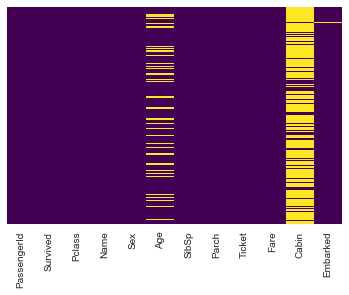

In [306]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [307]:
sns.set_style('whitegrid')

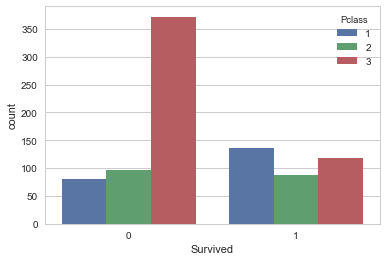

In [308]:
sns.countplot(x='Survived',hue='Pclass',data=train)

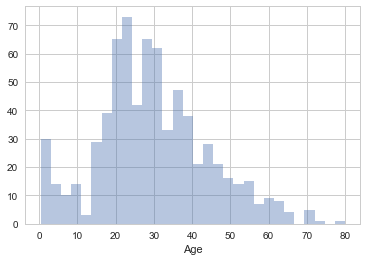

In [309]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

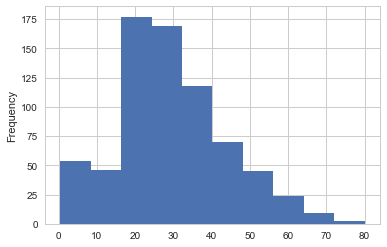

In [310]:
train['Age'].plot.hist()

In [311]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


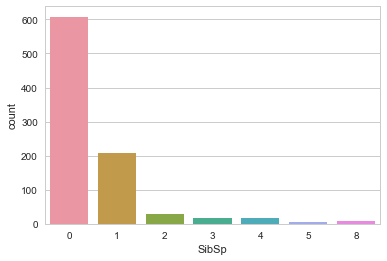

In [312]:
sns.countplot(x='SibSp',data=train)

In [313]:
print("There are %i unique ticket numbers among the %i tickets." \
      %(train['Ticket'].nunique(),train['Ticket'].count()))

There are 681 unique ticket numbers among the 891 tickets.


In [314]:
grouped = train.groupby('Ticket')
k = 0
for name, group in grouped:
    if (len(grouped.get_group(name)) > 1):
        print(group.loc[:,['Survived','Name']])
        k += 1
    if (k>10):
        break

     Survived                                               Name
257         1                               Cherry, Miss. Gladys
504         1                              Maioni, Miss. Roberta
759         1  Rothes, the Countess. of (Lucy Noel Martha Dye...
     Survived                                    Name
262         0                       Taussig, Mr. Emil
558         1  Taussig, Mrs. Emil (Tillie Mandelbaum)
585         1                     Taussig, Miss. Ruth
     Survived                            Name
110         0  Porter, Mr. Walter Chamberlain
475         0     Clifford, Mr. George Quincy
     Survived                                             Name
329         1                     Hippach, Miss. Jean Gertrude
523         1  Hippach, Mrs. Louis Albert (Ida Sophia Fischer)
     Survived                                    Name
166         1  Chibnall, Mrs. (Edith Martha Bowerman)
356         1             Bowerman, Miss. Elsie Edith
     Survived                      

In [315]:
print(train[train['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


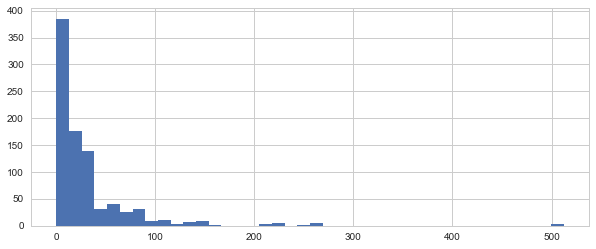

In [316]:
train['Fare'].hist(bins=40,figsize=(10,4))

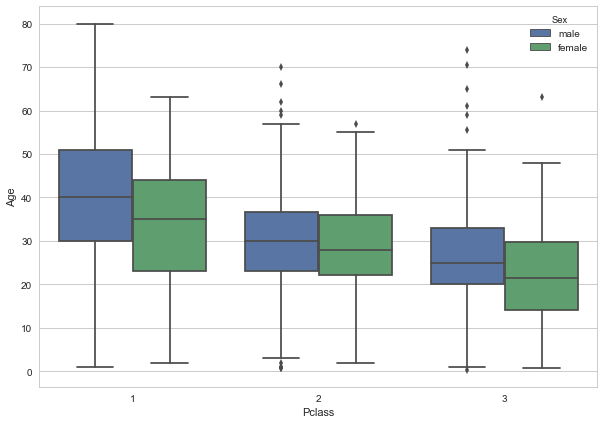

In [317]:
plt.figure(figsize=(10,7))

sns.boxplot(x='Pclass',y='Age',hue='Sex',data=train)
#sns.swarmplot(x='Pclass',y='Age',hue='Sex',data=train)

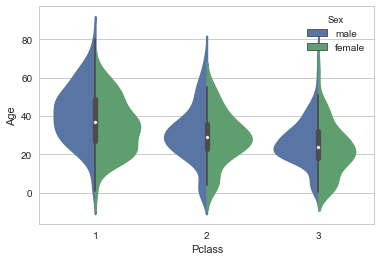

In [318]:
sns.violinplot(x='Pclass',y='Age',hue='Sex',data=train,split=True)

In [319]:
def impute_age(cols):
    Age = cols[0]
    Pclass =cols[1]
    Sex = cols[2]
    if pd.isnull(Age):
        if Pclass==1:
            if Sex == 'male':
                return 40
            elif Sex == 'female':
                return 35
        elif Pclass ==2:
            if Sex == 'male':
                return 30
            elif Sex == 'female':
                return 27
        else:
            if Sex == 'male':
                return 25
            elif Sex == 'female':
                return 22
    else:
        return Age

In [320]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [321]:

train['Age']= train[['Age','Pclass','Sex']].apply(impute_age,axis=1)

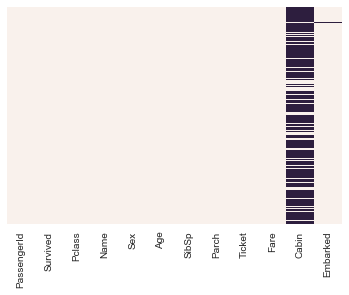

In [322]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [323]:
def impute_name(cols):
    Name = cols[0]
    if 'Mrs' in Name:
        return 'A'
    elif 'Mr' in Name:
        return 'B'
    elif 'Miss' in Name:
        return 'C'
    else: return 'D'
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [324]:
train['Name']= train[['Name']].apply(impute_name,axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,B,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,A,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,C,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,A,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,B,male,35.0,0,0,373450,8.0500,NaN,S


In [325]:
train.drop('Cabin',axis=1,inplace=True)

In [326]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,B,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,A,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,C,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,A,female,35.0,1,0,113803,53.1000,S
4,5,0,3,B,male,35.0,0,0,373450,8.0500,S


In [327]:
train.dropna(inplace=True)

In [328]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
sex.head()


,male
0,1
1,0
2,0
3,0
4,1


In [329]:
names= pd.get_dummies(train['Name'],drop_first=True)
names.head()

,B,C,D
0,1,0,0
1,0,0,0
2,0,1,0
3,0,0,0
4,1,0,0


In [330]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [331]:
pclass=pd.get_dummies(train['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [332]:
train=pd.concat([train,sex,names,embark,pclass],axis=1)

In [333]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,B,C,D,Q,S,2,3
0,1,0,3,B,male,22.0,1,0,A/5 21171,7.2500,S,1,1,0,0,0,1,0,1
1,2,1,1,A,female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,0,0,0
2,3,1,3,C,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1,0,1
3,4,1,1,A,female,35.0,1,0,113803,53.1000,S,0,0,0,0,0,1,0,0
4,5,0,3,B,male,35.0,0,0,373450,8.0500,S,1,1,0,0,0,1,0,1


In [334]:
train.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)

In [335]:
train.drop('PassengerId',axis=1,inplace=True)

In [336]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,B,C,D,Q,S,2,3
0,0,22.0,1,0,7.2500,1,1,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,1,0,0,0,1,0,1


In [337]:
print(np.median(train['Age'].dropna()))
print(train.groupby(['B']).mean())

26.0
   Survived        Age     SibSp     Parch       Fare     male        C  \
B                                                                         
0  0.695418  25.893989  0.851752  0.703504  42.697395  0.15903  0.48248   
1  0.158301  31.373552  0.289575  0.152510  24.504277  1.00000  0.00000   

          D         Q         S         2         3  
B                                                    
0  0.172507  0.113208  0.665768  0.250674  0.463612  
1  0.000000  0.067568  0.766409  0.175676  0.615830  


In [338]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [339]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [340]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [341]:
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [346]:
#{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 50}
logmodel= LogisticRegression()
percpmodel = Perceptron(class_weight='balanced')
knnmodel = KNeighborsClassifier(n_neighbors=5,weights='distance')
svcmodel = SVC(class_weight='balanced')
baggingmodel = BaggingClassifier(KNeighborsClassifier(n_neighbors=2,weights='distance'),n_estimators=50,
                                 oob_score=True,max_samples=0.5,max_features=1.0)
dtcmodel = DecisionTreeClassifier(class_weight="balanced",min_weight_fraction_leaf=0.01,min_samples_leaf= 1,
                                  min_samples_split= 8)
rfmodel = RandomForestClassifier(n_estimators=1000,max_depth=None,min_samples_split=10)
rf2model = RandomForestClassifier(n_estimators=1000,max_depth=None,min_samples_split=8,min_samples_leaf= 1)
rf3model = RandomForestClassifier(n_estimators=50,max_depth=None,min_samples_split=8,min_samples_leaf=1)
etcmodel = ExtraTreesClassifier(max_features='auto',bootstrap=True,oob_score=True,n_estimators=1000,max_depth=None,
                                min_samples_split=8,min_samples_leaf= 1)
etc2model = ExtraTreesClassifier(max_features='auto',bootstrap=True,oob_score=True,n_estimators=50,max_depth=None,
                                min_samples_split=8,min_samples_leaf= 1)
import warnings
warnings.filterwarnings("ignore")

gbmodel = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,max_depth=3,subsample=0.5,random_state=0,
                                    min_samples_split=8,min_samples_leaf= 1)

adamodel = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)

In [347]:
logmodel.fit(X_train,y_train)
percpmodel.fit(X_train,y_train)
knnmodel.fit(X_train,y_train)
svcmodel.fit(X_train,y_train)
baggingmodel.fit(X_train,y_train)
dtcmodel.fit(X_train,y_train)
rfmodel.fit(X_train,y_train)
rf2model.fit(X_train,y_train)
rf3model.fit(X_train,y_train)
etcmodel.fit(X_train,y_train)
etc2model.fit(X_train,y_train)
gbmodel.fit(X_train,y_train)
adamodel.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=None)

In [348]:
predictions= logmodel.predict(X_test)
percppred= percpmodel.predict(X_test)
knnpred = knnmodel.predict(X_test)
svcpred = svcmodel.predict(X_test)
baggindpred= baggingmodel.predict(X_test)
dtcpred= dtcmodel.predict(X_test)
rfpred=rfmodel.predict(X_test)
rf2pred=rf2model.predict(X_test)
rf3pred=rf3model.predict(X_test)
etcpred=etcmodel.predict(X_test)
etc2pred=etc2model.predict(X_test)
gbpred=gbmodel.predict(X_test)
adapred=adamodel.predict(X_test)

In [349]:
from sklearn.metrics import classification_report

In [350]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.93      0.88       163
          1       0.86      0.70      0.77       104

avg / total       0.84      0.84      0.84       267



In [351]:
print(classification_report(y_test,percppred))

             precision    recall  f1-score   support

          0       0.77      0.82      0.80       163
          1       0.69      0.62      0.65       104

avg / total       0.74      0.74      0.74       267



In [352]:
print(classification_report(y_test,knnpred))

             precision    recall  f1-score   support

          0       0.78      0.78      0.78       163
          1       0.65      0.65      0.65       104

avg / total       0.73      0.73      0.73       267



In [353]:
print(classification_report(y_test,svcpred))


             precision    recall  f1-score   support

          0       0.83      0.68      0.75       163
          1       0.61      0.79      0.69       104

avg / total       0.75      0.72      0.73       267



In [354]:
print(classification_report(y_test,baggindpred))


             precision    recall  f1-score   support

          0       0.78      0.75      0.77       163
          1       0.64      0.67      0.65       104

avg / total       0.73      0.72      0.72       267



In [355]:
print(classification_report(y_test,dtcpred))


             precision    recall  f1-score   support

          0       0.84      0.78      0.81       163
          1       0.69      0.76      0.72       104

avg / total       0.78      0.77      0.77       267



In [356]:
print(classification_report(y_test,rfpred))

             precision    recall  f1-score   support

          0       0.84      0.94      0.88       163
          1       0.88      0.71      0.79       104

avg / total       0.85      0.85      0.85       267



In [357]:
print(classification_report(y_test,rf2pred))

             precision    recall  f1-score   support

          0       0.84      0.93      0.88       163
          1       0.87      0.72      0.79       104

avg / total       0.85      0.85      0.85       267



In [358]:
print(classification_report(y_test,rf3pred))

             precision    recall  f1-score   support

          0       0.84      0.93      0.88       163
          1       0.86      0.72      0.79       104

avg / total       0.85      0.85      0.84       267



In [359]:
print(classification_report(y_test,etcpred))

             precision    recall  f1-score   support

          0       0.83      0.93      0.88       163
          1       0.87      0.69      0.77       104

avg / total       0.84      0.84      0.83       267



In [360]:
print(classification_report(y_test,etc2pred))

             precision    recall  f1-score   support

          0       0.84      0.93      0.88       163
          1       0.87      0.71      0.78       104

avg / total       0.85      0.85      0.84       267



In [361]:
print(classification_report(y_test,gbpred))


             precision    recall  f1-score   support

          0       0.84      0.93      0.88       163
          1       0.87      0.71      0.78       104

avg / total       0.85      0.85      0.84       267



In [362]:
print(classification_report(y_test,adapred))

             precision    recall  f1-score   support

          0       0.82      0.91      0.86       163
          1       0.83      0.68      0.75       104

avg / total       0.82      0.82      0.82       267



In [363]:
clf_ext = ExtraTreesClassifier(max_features='auto',bootstrap=True,oob_score=True)
param_grid = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [8, 10, 12],
              "n_estimators": [20, 50, 100]}
gs = GridSearchCV(estimator=clf_ext, param_grid=param_grid, scoring='accuracy', cv=3)
gs = gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.811897106109
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [365]:
clf_ext = ExtraTreesClassifier(
    max_features='auto',
    bootstrap=True,
    oob_score=True,
    criterion='gini',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=100
    )
clf_ext = clf_ext.fit(X_train,y_train)
ext_pred = clf_ext.predict(X_test)
print(classification_report(y_test,ext_pred))

             precision    recall  f1-score   support

          0       0.83      0.93      0.88       163
          1       0.87      0.70      0.78       104

avg / total       0.85      0.84      0.84       267



In [366]:
from sklearn.metrics import confusion_matrix

In [367]:
confusion_matrix(y_test,ext_pred)

array([[152,  11],
       [ 31,  73]])